# Information

I worked with (https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand) dataset from UCI. 

# Importing dataset

In [ ]:
# Imported and read the data

In [ ]:
import pandas as pd
bike = pd.read_csv('SeoulBikeData.csv',encoding='latin1')
bike

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


# Pre Analysis





In [ ]:
# Let's drop the parantheses and simplify the column names

In [ ]:
new_columns=[x.replace("(m/s)","").replace("(°C)","").replace("(%)","").replace("(MJ/m2)","").replace("(cm)","").replace("(mm)","").replace("(10m)","") for x in bike.columns]
bike.columns = new_columns

In [ ]:
bike

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [ ]:
# Checking our data and identifying whether we have null data or not 

In [ ]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   8760 non-null   object 
 1   Rented Bike Count      8760 non-null   int64  
 2   Hour                   8760 non-null   int64  
 3   Temperature            8760 non-null   float64
 4   Humidity               8760 non-null   int64  
 5   Wind speed             8760 non-null   float64
 6   Visibility             8760 non-null   int64  
 7   Dew point temperature  8760 non-null   float64
 8   Solar Radiation        8760 non-null   float64
 9   Rainfall               8760 non-null   float64
 10  Snowfall               8760 non-null   float64
 11  Seasons                8760 non-null   object 
 12  Holiday                8760 non-null   object 
 13  Functioning Day        8760 non-null   object 
dtypes: float64(6), int64(4), object(4)
memory usage: 958.2+ 

In [ ]:
# We have no null data. So we may proceed. Next, let's take a look at our correlations between our features to have a 
#broad idea of whether we have a key attribute that is highly correlated with Rented Bike Count.

In [ ]:
bike.corr()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall
Rented Bike Count,1.000000,0.410257,0.538558,-0.199780,0.121108,0.199280,0.379788,0.261837,-0.123074,-0.141804
Hour,0.410257,1.000000,0.124114,-0.241644,0.285197,0.098753,0.003054,0.145131,0.008715,-0.021516
Temperature,0.538558,0.124114,1.000000,0.159371,-0.036252,0.034794,0.912798,0.353505,0.050282,-0.218405
Humidity,-0.199780,-0.241644,0.159371,1.000000,-0.336683,-0.543090,0.536894,-0.461919,0.236397,0.108183
Wind speed,0.121108,0.285197,-0.036252,-0.336683,1.000000,0.171507,-0.176486,0.332274,-0.019674,-0.003554
Visibility,0.199280,0.098753,0.034794,-0.543090,0.171507,1.000000,-0.176630,0.149738,-0.167629,-0.121695
Dew point temperature,0.379788,0.003054,0.912798,0.536894,-0.176486,-0.176630,1.000000,0.094381,0.125597,-0.150887
Solar Radiation,0.261837,0.145131,0.353505,-0.461919,0.332274,0.149738,0.094381,1.000000,-0.074290,-0.072301
Rainfall,-0.123074,0.008715,0.050282,0.236397,-0.019674,-0.167629,0.125597,-0.074290,1.000000,0.008500
Snowfall,-0.141804,-0.021516,-0.218405,0.108183,-0.003554,-0.121695,-0.150887,-0.072301,0.008500,1.000000


In [ ]:
# We see that the closest thing we have is 0.53 correlation which is not that significant to me. 
# I would have rathered 0.7 or higher to take more serious actions.

In [ ]:
# Now, we have 4 categorical features: Date, Seasons, Holiday and Functioning Day.
# I want to change our Date column to months but I don't know if it is a smart thing to do.

In [ ]:
# Let's take a look on our numerical attributes

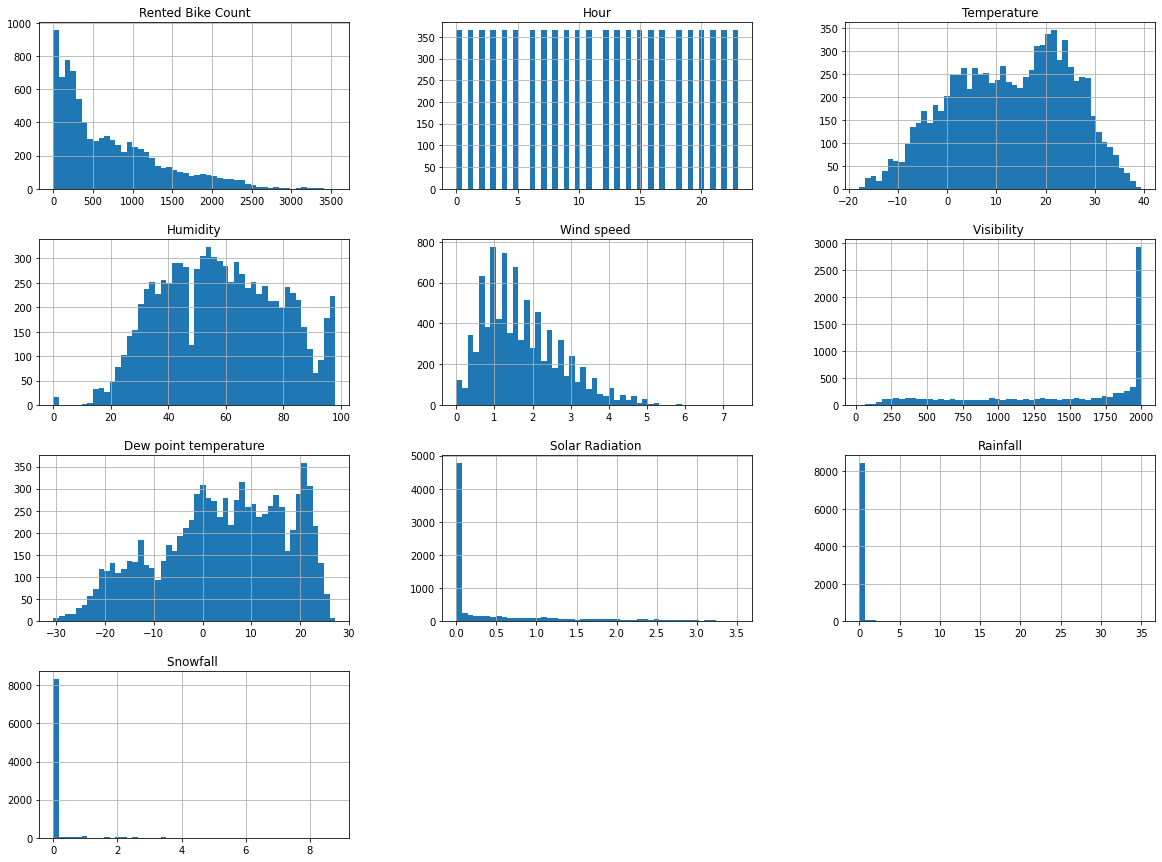

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
bike.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# I see that our Snowfall, Rainfall, Solar Radiation and Visibility data are not distributed well.

In [ ]:
bike["Rainfall"].value_counts()

0.0     8232
0.5      116
1.0       66
1.5       56
0.1       46
        ... 
21.0       1
15.5       1
10.5       1
17.0       1
9.1        1
Name: Rainfall, Length: 61, dtype: int64

# Handling Categorical Attribute

In [ ]:
#when we were looking the data on excel we realized that the months and days made a significant difference on number of bikes so that we added month and dayOfWeek column to our dataframe
import datetime
bike["month"]=[datetime.datetime.strptime(date,'%d/%m/%Y').month for date in bike["Date"]]
bike["dayOfWeek"]=[datetime.datetime.strptime(date,'%d/%m/%Y').weekday() for date in bike["Date"]]

#we added months so season is not important right now because months will give a better prediction to us
bike.drop("Seasons",axis=1,inplace=True)

In [ ]:
## Now we start encoding categorial data because these columns cannot be inserted in to linear regression algorithm
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
oneHotEncoder = OneHotEncoder()
labelEncoder=LabelEncoder();
holiday_cat = bike["Holiday"]
holidayLabelEncoded=labelEncoder.fit_transform(holiday_cat)
holiday_cat_encoded = pd.DataFrame(oneHotEncoder.fit_transform(holidayLabelEncoded.reshape(-1,1)).toarray())
holiday_cat_encoded.columns=oneHotEncoder.get_feature_names(["Holiday"])
bike=bike.join(holiday_cat_encoded)
bike.drop("Holiday",axis=1,inplace=True);
bike



,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Functioning Day,month,dayOfWeek,Holiday_0,Holiday_1
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes,12,4,0.0,1.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes,12,4,0.0,1.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes,12,4,0.0,1.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes,12,4,0.0,1.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes,12,4,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Yes,11,4,0.0,1.0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Yes,11,4,0.0,1.0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Yes,11,4,0.0,1.0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Yes,11,4,0.0,1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
oneHotEncoder = OneHotEncoder()
labelEncoder=LabelEncoder();
function_cat = bike["Functioning Day"]
functionLabelEncoded=labelEncoder.fit_transform(function_cat)
function_cat_encoded = pd.DataFrame(oneHotEncoder.fit_transform(functionLabelEncoded.reshape(-1,1)).toarray())
function_cat_encoded.columns=oneHotEncoder.get_feature_names(["Functioning Day"])
bike=bike.join(function_cat_encoded)
bike.drop("Functioning Day",axis=1,inplace=True);
bike

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,month,dayOfWeek,Holiday_0,Holiday_1,Functioning Day_0,Functioning Day_1
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,12,4,0.0,1.0,0.0,1.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,12,4,0.0,1.0,0.0,1.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,12,4,0.0,1.0,0.0,1.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,12,4,0.0,1.0,0.0,1.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,12,4,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,11,4,0.0,1.0,0.0,1.0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,11,4,0.0,1.0,0.0,1.0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,11,4,0.0,1.0,0.0,1.0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,11,4,0.0,1.0,0.0,1.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
oneHotEncoder = OneHotEncoder()
labelEncoder=LabelEncoder();
month_cat = bike["month"]
monthLabelEncoded=labelEncoder.fit_transform(month_cat)
month_cat_encoded = pd.DataFrame(oneHotEncoder.fit_transform(monthLabelEncoded.reshape(-1,1)).toarray())
month_cat_encoded.columns=oneHotEncoder.get_feature_names(["month"])
bike=bike.join(month_cat_encoded)
bike.drop("month",axis=1,inplace=True);
bike

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,dayOfWeek,Holiday_0,Holiday_1,Functioning Day_0,Functioning Day_1,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
oneHotEncoder = OneHotEncoder()
labelEncoder=LabelEncoder();
day_cat = bike["dayOfWeek"]
dayLabelEncoded=labelEncoder.fit_transform(month_cat)
day_cat_encoded = pd.DataFrame(oneHotEncoder.fit_transform(dayLabelEncoded.reshape(-1,1)).toarray())
day_cat_encoded.columns=oneHotEncoder.get_feature_names(["dayOfWeek"])
bike=bike.join(day_cat_encoded)
bike.drop("dayOfWeek",axis=1,inplace=True);
bike

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday_0,Holiday_1,Functioning Day_0,Functioning Day_1,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,dayOfWeek_0,dayOfWeek_1,dayOfWeek_2,dayOfWeek_3,dayOfWeek_4,dayOfWeek_5,dayOfWeek_6,dayOfWeek_7,dayOfWeek_8,dayOfWeek_9,dayOfWeek_10,dayOfWeek_11
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
oneHotEncoder = OneHotEncoder()
labelEncoder=LabelEncoder();
hour_cat = bike["Hour"]
hourLabelEncoded=labelEncoder.fit_transform(hour_cat)
hour_cat_encoded = pd.DataFrame(oneHotEncoder.fit_transform(hourLabelEncoded.reshape(-1,1)).toarray())
hour_cat_encoded.columns=oneHotEncoder.get_feature_names(["Hour"])
bike=bike.join(hour_cat_encoded)
bike.drop("Hour",axis=1,inplace=True);
bike

,Date,Rented Bike Count,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday_0,Holiday_1,Functioning Day_0,Functioning Day_1,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,dayOfWeek_0,dayOfWeek_1,dayOfWeek_2,dayOfWeek_3,dayOfWeek_4,dayOfWeek_5,dayOfWeek_6,dayOfWeek_7,dayOfWeek_8,dayOfWeek_9,dayOfWeek_10,dayOfWeek_11,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,01/12/2017,254,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,01/12/2017,204,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,01/12/2017,173,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,01/12/2017,107,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,01/12/2017,78,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8756,30/11/2018,764,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8757,30/11/2018,694,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8758,30/11/2018,712,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# Dividing dataset into  Test / Train 

In [ ]:
# Let's split our data into train and test.

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(bike, test_size=0.2, random_state=36)

In [ ]:
# Let's check how our test and train sets are.

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7008 entries, 1445 to 610
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   7008 non-null   object 
 1   Rented Bike Count      7008 non-null   int64  
 2   Temperature            7008 non-null   float64
 3   Humidity               7008 non-null   int64  
 4   Wind speed             7008 non-null   float64
 5   Visibility             7008 non-null   int64  
 6   Dew point temperature  7008 non-null   float64
 7   Solar Radiation        7008 non-null   float64
 8   Rainfall               7008 non-null   float64
 9   Snowfall               7008 non-null   float64
 10  Holiday_0              7008 non-null   float64
 11  Holiday_1              7008 non-null   float64
 12  Functioning Day_0      7008 non-null   float64
 13  Functioning Day_1      7008 non-null   float64
 14  month_0                7008 non-null   float64
 15  mo

In [ ]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1752 entries, 3244 to 1442
Data columns (total 62 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Date                   1752 non-null   object 
 1   Rented Bike Count      1752 non-null   int64  
 2   Temperature            1752 non-null   float64
 3   Humidity               1752 non-null   int64  
 4   Wind speed             1752 non-null   float64
 5   Visibility             1752 non-null   int64  
 6   Dew point temperature  1752 non-null   float64
 7   Solar Radiation        1752 non-null   float64
 8   Rainfall               1752 non-null   float64
 9   Snowfall               1752 non-null   float64
 10  Holiday_0              1752 non-null   float64
 11  Holiday_1              1752 non-null   float64
 12  Functioning Day_0      1752 non-null   float64
 13  Functioning Day_1      1752 non-null   float64
 14  month_0                1752 non-null   float64
 15  m

In [ ]:
test_set = test_set.drop("Date",axis=1)

# Pre-processing

In [ ]:
# Now, I used Stratified Sampling and compared it to not using it. Turns out it decreases R2 so I decided to
# remove it.

In [ ]:
bike = train_set.copy()

In [ ]:
corr_matrix = bike.corr()
corr_matrix["Rented Bike Count"].sort_values(ascending=False)

Rented Bike Count        1.000000
Temperature              0.541445
Dew point temperature    0.382551
Hour_18                  0.261214
Solar Radiation          0.260978
                           ...   
month_1                 -0.211378
dayOfWeek_11            -0.215829
month_11                -0.215829
month_0                 -0.233415
dayOfWeek_0             -0.233415
Name: Rented Bike Count, Length: 61, dtype: float64

In [ ]:
# Here I am labeling my target column and removing it from my dataset since I'm trying to predict it.

In [ ]:
bike = train_set.drop("Rented Bike Count", axis=1)
bike_labels = train_set["Rented Bike Count"].copy()
test_set_labels=test_set["Rented Bike Count"].copy()
test_set=test_set.drop("Rented Bike Count", axis=1)

,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Solar Radiation,Rainfall,Snowfall,Holiday_0,Holiday_1,Functioning Day_0,Functioning Day_1,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,dayOfWeek_0,dayOfWeek_1,dayOfWeek_2,dayOfWeek_3,dayOfWeek_4,dayOfWeek_5,dayOfWeek_6,dayOfWeek_7,dayOfWeek_8,dayOfWeek_9,dayOfWeek_10,dayOfWeek_11,Hour_0,Hour_1,Hour_2,Hour_3,Hour_4,Hour_5,Hour_6,Hour_7,Hour_8,Hour_9,Hour_10,Hour_11,Hour_12,Hour_13,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
3244,6.0,84,1.7,951,3.4,0.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8396,9.5,49,1.3,918,-0.7,0.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5697,29.1,69,1.0,853,22.8,0.67,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4854,19.5,80,1.6,709,15.9,0.04,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1920,-1.1,39,1.7,1832,-13.3,0.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8428,1.7,74,1.7,1226,-2.4,0.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3941,11.9,93,0.8,241,10.7,0.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7192,24.4,35,1.8,2000,7.9,1.71,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8687,5.8,34,2.6,763,-8.8,0.00,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
#we dropped date column because we already parsed it and got some additional columns
bike_num = bike.drop("Date", axis=1)


# Linear Regression on Non-scaled Data

In [ ]:
# NOW, without scaled-data:

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(bike_num, bike_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Performance of Train Set with not-scaled data:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

bike_predictions = lin_reg.predict(bike_num)
lin_mse = mean_squared_error(bike_labels, bike_predictions)
lin_rmse = np.sqrt(lin_mse)
r2 = r2_score(bike_labels, bike_predictions)
print(lin_mse)
print(lin_rmse)
print(r2)

127092.63464513623
356.50053947383617
0.6944069321535897


In [ ]:
# Performance of Test Set with not-scaled data:

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import numpy as np

bike_predictions = lin_reg.predict(test_set)
lin_mse = mean_squared_error(test_set_labels, bike_predictions)
lin_rmse = np.sqrt(lin_mse)
r2 = r2_score(test_set_labels, bike_predictions)
print(lin_mse)
print(lin_rmse)
print(r2)

121547.78139439243
348.6370338825071
0.7080113446427028


# Decision Tree on Non-scaled Data

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(bike_num, bike_labels)
bike_pred_tree = tree_reg.predict(bike_num)

In [ ]:
# Performance of Train Set

tree_mse = mean_squared_error(bike_labels, bike_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = r2_score(bike_labels, bike_pred_tree)

print(tree_mse)
print(tree_rmse)
print(tree_r2)

0.0
0.0
1.0


# Scaling Data

In [ ]:
# Here I am scaling my data using some transformation pipelines based on "".

In [ ]:
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler()),
                        ])
bike_num_tr = num_pipeline.fit_transform(bike_num)


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values
    
num_attribs = list(bike_num)
cat_attribs = ['Snowfall ','Rainfall','Visibility ','Solar Radiation ']

num_pipeline = Pipeline([('selector', DataFrameSelector(num_attribs)),
                         ('imputer', SimpleImputer(strategy="median")),
                         ('std_scaler', StandardScaler())
                        ])

cat_pipeline = Pipeline([('selector', DataFrameSelector(cat_attribs)),
                         ('one_hot', OneHotEncoder())
                        ])

In [ ]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[("num_pipeline", num_pipeline),
                                               ("cat_pipeline", cat_pipeline)
                                              ])

bike_prepared = full_pipeline.fit_transform(bike_num)
bike_prepared


<7008x2203 sparse matrix of type '<class 'numpy.float64'>'
	with 448512 stored elements in Compressed Sparse Row format>

In [ ]:
# Checking the density

In [ ]:
bike_prepared.todense()

matrix([[-2.03282906, -0.26343131, -0.11720182, ...,  0.        ,
          0.        ,  0.        ],
        [-1.17651265,  1.2096596 , -0.98411322, ...,  0.        ,
          0.        ,  0.        ],
        [-0.93305014, -1.19638889, -0.50249578, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.0827762 ,  0.37490808, -0.11720182, ...,  0.        ,
          0.        ,  0.        ],
        [-0.21945312,  1.35696869,  0.74970957, ...,  0.        ,
          0.        ,  0.        ],
        [-1.2688605 , -1.09818283,  2.29088537, ...,  0.        ,
          0.        ,  0.        ]])

# Linear Regression on Scaled Data

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(bike_prepared, bike_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Performance of Train Set with scaled-data

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

bike_predictions = lin_reg.predict(bike_prepared)
lin_mse = mean_squared_error(bike_labels, bike_predictions)
lin_rmse = np.sqrt(lin_mse)
r2 = r2_score(bike_labels, bike_predictions)
print(lin_mse)
print(lin_rmse)
print(r2)

79449.58087485294
281.868020312438
0.8089642155389298


In [ ]:
bike_test = full_pipeline.fit_transform(test_set)

In [ ]:
# Performance of Test Set
#from sklearn.metrics import mean_squared_error
#from sklearn.metrics import r2_score
#bike_pred_test = lin_reg.predict(bike_test)
#lin_mse_test = mean_squared_error(bike_labels_test, bike_pred_test)
#lin_rmse_test = np.sqrt(lin_mse_test)
#r2_test = r2_score(bike_labels_test, bike_pred_test)
#print(lin_mse_test)
#print(lin_rmse_test)
#print(r2_test)

ValueError: ignored

# Decision Tree on Scaled Data

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(bike_prepared, bike_labels)
bike_pred_tree = tree_reg.predict(bike_prepared)

tree_mse = mean_squared_error(bike_labels, bike_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = r2_score(bike_labels, bike_pred_tree)
print(tree_mse)
print(tree_rmse)
print(tree_r2)

0.0
0.0
1.0


In [ ]:
##Performance of Test Set 

# bike_pred_tree_test = tree_reg.predict(bike_test)
# tree_mse_test = mean_squared_error(bike_labels_test, bike_pred_tree_test)
# tree_rmse_test = np.sqrt(tree_mse_test)
# tree_r2_test = r2_score(bike_labels_test, bike_pred_tree_test)

# print(tree_rmse_test)
# print(tree_r2_test)

# Analysis of Results

1.   Linear Regression with Non-Scaled  Data(With training data): 

    *   MSE: 127092.62772991841
    *   RMSE: 356.500529775088
    *   R2: 0.6944069487811673
2.   Linear Regression with Non-Scaled  Data(With test data): 

    *   MSE: 121547.78139439243
    *   RMSE: 348.6370338825071
    *   R2: 0.7080113446427028


3.   Linear Regression with Scaled Data:

    *   MSE: 79449.58087485294
    *   RMSE: 281.868020312438
    *   R2: 0.8089642155389298

4.   Decision Tree with Scaled Data:

    *   MSE: 0.0
    *   RMSE: 0.0
    *   R2: 1.0

5.   Decision Tree with Non-Scaled Data:

    *   MSE: 0.0
    *   RMSE: 0.0
    *   R2: 1.0

We see that, Decision Tree is always better in every case than Linear Regression. 
  R2 determines how good our model works. The higher the R2 the better/accurate results we have. 
  We first parsed Seasons into 0,1,2,3s and the Date column into month, dayOfWeek and hours. We added hours because in our pre analysis, we saw that throughout the day, the hours made a big difference. This way, we have data on a season,month, hour and the day of the week basis now. Right after this, we parsed Holiday and Functioning Day categories into 0 and 1s. After all these actions, we got rid of the previous ones since we already have joined the parsed ones.

In conclusion, we can see that MSE and RMSE are errors and R2 is our performance indicator. The bigger the R2 the better results we have. As we see, with scaled data, there is a significant difference of 0.1. With scaled data, we have %80 accuracy whereas with non-scaled data we have %69. And overall, DecisionTree is always better than Linear Regression.











 